Wie unterscheiden sich die Bewertungen der Kandidaten und die der Bols?

In [1]:
# Laden einiger Bibliotheken
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Grafik style
sns.set_style("whitegrid")

In [2]:
# lade den Datensatz
df = pd.read_csv("../data/bewertungen.csv", parse_dates=["Datum"], dayfirst=True)

# füge eine Spalte mit der Bolwertung hinzu
df["Bolwertung"] = round(df[["M", "A", "C"]].mean(axis=1) * 4)

df.tail(10)

,WochenID,FolgenID,Datum,Ort,K1,K2,K3,K4,K5,Summe,M,A,C,Person,Bemerkung,YT-Link,Bolwertung
44,10,1062,2010-05-03,Oldenburg,NaN,8.0,6.0,9.0,7.0,30,8.0,8.0,8.0,Nasrin,NaN,NaN,32.0
45,10,1063,2010-05-04,Oldenburg,5.0,NaN,8.0,7.0,8.0,28,7.0,7.0,8.0,Silke,NaN,NaN,29.0
46,10,1064,2010-05-05,Oldenburg,6.0,6.0,NaN,8.0,6.0,26,8.0,7.0,8.0,Rüdiger,NaN,NaN,31.0
47,10,1065,2010-05-06,Oldenburg,7.0,8.0,6.0,NaN,8.0,29,4.0,1.0,5.0,Marion,NaN,NaN,13.0
48,10,1066,2010-05-07,Oldenburg,7.0,7.0,5.0,7.0,NaN,26,8.0,8.0,9.0,Stephan,NaN,NaN,33.0
49,11,983,2010-01-11,Krefeld,NaN,5.0,6.0,5.0,5.0,21,6.0,6.0,5.0,Daniela,NaN,NaN,23.0
50,11,984,2010-01-12,Krefeld,7.0,NaN,5.0,7.0,9.0,28,9.0,8.0,8.0,Wolf-Dieter,NaN,NaN,33.0
51,11,985,2010-01-13,Krefeld,6.0,6.0,NaN,5.0,6.0,23,5.0,6.0,6.0,Sabrina,NaN,NaN,23.0
52,11,986,2010-01-14,Krefeld,10.0,8.0,8.0,NaN,9.0,35,9.0,9.0,8.0,Willi,NaN,NaN,35.0
53,11,987,2010-01-15,Krefeld,7.0,6.0,6.0,5.0,NaN,24,3.0,3.0,4.0,Adriane,NaN,NaN,13.0


In [3]:
def plot_ddd_vs_dpd(data, axis_min=None, axis_range=(10, 40)):
    # WochenID der letzten Woche
    last_week = data["WochenID"].max()

    # colors = ["0.4" for _ in range(len(df) - 6)] + ["r" for _ in range(5)]

    # scatterplot
    g = sns.scatterplot(
        data=df,
        x="Summe",
        y="Bolwertung",
        hue=data["WochenID"] == last_week,
        # hue="WochenID",
        palette=sns.color_palette(n_colors=2),
    )

    # title
    g.set_title("Wertung Kandidaten vs Bols")

    # achsen
    g.set_xlim(axis_range)
    g.set_ylim(axis_range)
    g.set_aspect("equal", adjustable="box")
    g.set_xlabel("Kandidaten")
    g.set_ylabel("Bols")

    # füge diagonale linie hinzu
    linespace = np.linspace(*axis_range)
    sns.lineplot(x=linespace, y=linespace, color="grey", alpha=0.5)

    # legende
    g.legend(title="Woche")

    # highlighte wichtige datenpunkte
    for index, row in df.iterrows():
        # perfektes dinner
        if row["Summe"] >= 35 and row["Bolwertung"] >= 35:
            g.annotate(
                row["Person"],
                (row["Summe"], row["Bolwertung"]),
                size=8,
                color="g",
            )

        # katastrophen dinner
        if row["Summe"] <= 15 or row["Bolwertung"] <= 15:
            g.annotate(
                row["Person"],
                (row["Summe"], row["Bolwertung"]),
                size=8,
                color="r",
            )

        # aktuelle woche
        elif row["WochenID"] == last_week:
            g.annotate(row["Person"], (row["Summe"], row["Bolwertung"]), size=8)

    return g


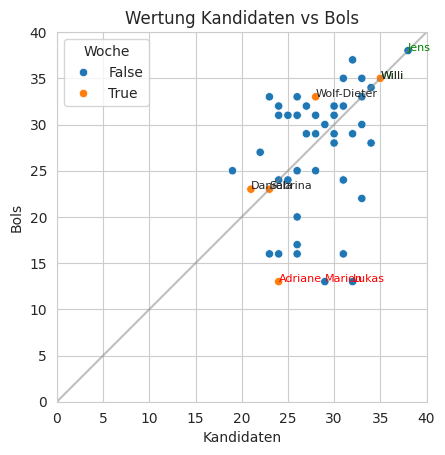

In [4]:
plot = plot_ddd_vs_dpd(df, axis_range=(0,40))

#plot.get_figure().savefig("out.png", dpi=200)